In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import sys
sys.path.insert(1, '../src/')
from titanic import *

/home/ian/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# importing data sets from kernel 

train = pd.read_csv('../data/raw/train.csv')
test = pd.read_csv('../data/raw/test.csv')
print('     In Training Set:', len(train))
print('     In Test Set:', len(test))
train.head()

     In Training Set: 891
     In Test Set: 418


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Fill missing data

In [4]:
df = one_hot_age_gender(train)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Boy,Girl,Man,Woman
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0


In [5]:
m = len(df.loc[df['Man'] == 1])
w = len(df.loc[df['Woman'] == 1])
b = len(df.loc[df['Boy'] == 1])
g = len(df.loc[df['Girl'] == 1])
tot = m + w + b + g
print(f'Total Men:   {m}')
print(f'Total Woman: {w}')
print(f'Total Men:   {b}')
print(f'Total Woman: {g}')
print(f'All Records: {tot}')
len(df)

Total Men:   533
Total Woman: 235
Total Men:   44
Total Woman: 79
All Records: 891


891

In [7]:
df = df.drop('Cabin', axis=1)

df = append_one_hot(df, 'Embarked')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Boy,Girl,Man,Woman,Embarked C,Embarked Q,Embarked S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,0,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,0,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,0,1,0,0,0,1


In [9]:
df = fill_na_by_group(df, 'Age', ['Boy', 'Girl', 'Man', 'Woman'])
df.head()

Filling missing values for Boy with mean of 5.466749999999999
Filling missing values for Girl with mean of 7.209302325581396
Filling missing values for Man with mean of 33.17312348668281
Filling missing values for Woman with mean of 32.0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Boy,Girl,Man,Woman,Embarked C,Embarked Q,Embarked S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,0,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,0,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,0,1,0,0,0,1


Test Holdout Accuracy:   0.7802690582959642
Test Holdout Recall:     0.6888888888888889
Test Holdout Precision:  0.7469879518072289
Test Holdout F1:         0.7167630057803468




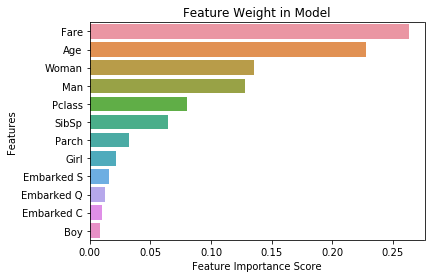




 Predicted    0   1
Actual            
0          112  21
1           28  62


In [10]:
w_age_df = df.drop(['Embarked', 'Ticket', 'Sex', 'Name'], axis=1).set_index('PassengerId')

model2 = quick_random_forest(w_age_df, 'Survived')

In [18]:
#grid search params with first model
params1 = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [5, 10, 25, 100],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 2, 3, 10],
    'max_features': [12, 10, 8],
    'max_leaf_nodes': [5, 25, 75, 250],
    'oob_score': [False, True],
    'n_jobs': [-1],
    'random_state':[32]
}

gs1 = GridSearchCV(model, params1, n_jobs=-1, cv=3)
gs1.fit(w_age_df.drop('Survived', axis=1), w_age_df['Survived'])
gs1.best_score_

0.835016835016835

In [19]:
gs1.best_params_

{'max_depth': 5,
 'max_features': 10,
 'max_leaf_nodes': 25,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 32}

Test Holdout Accuracy:   0.8654708520179372
Test Holdout Recall:     0.7333333333333333
Test Holdout Precision:  0.9166666666666666
Test Holdout F1:         0.8148148148148148




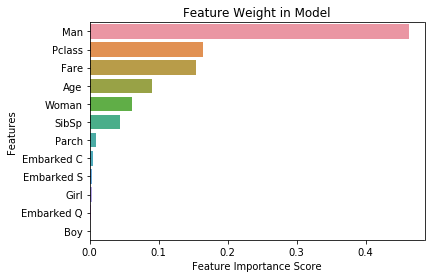




 Predicted    0   1
Actual            
0          127   6
1           24  66


In [25]:
opt_model = gs1.best_estimator_

x_col = list(w_age_df.columns)
x_col.remove('Survived')
X = w_age_df[x_col]
y = w_age_df[['Survived']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 32)

y_pred = opt_model.predict(X_test)
rf_stats_and_features(opt_model, y_test, y_pred, x_col, 'Survived')